## Q11_Ans_Implement a Multi-class neural network with a multiple hidden layer for MNSIT Dataset using keras library. Apply L1 and L2 Regularization

# MNIST DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [2]:
# import dataset
from keras.datasets import mnist

# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


# Data Visualization

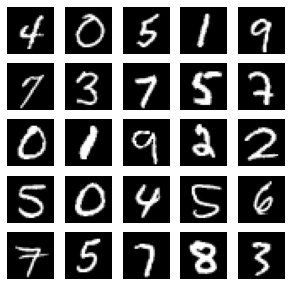

In [3]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

# Import Keras layers

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

# Compute the number of labels

In [5]:
num_labels = len(np.unique(y_train))

# One-Hot Encoding 

In [6]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Data Preprocessing

In [7]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [8]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

# Setting network parameters

In [9]:
#The batch_size argument indicates the number of data that we will use for each update of the model parameters.
batch_size = 128
hidden_units = 256 #
dropout = 0.45

# Define Model

In [10]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# View model summary

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

# Implement MLP model using Keras
**The implementation of MLP model in Keras comprises of three steps:-**

* Compiling the model with the compile() method.
* Training the model with fit() method.
* Evaluating the model performance with evaluate() method.

# Compile the model with compile() method

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with fit() method

In [13]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 4s 7ms/step - loss: 0.4121 - accuracy: 0.8736
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1902 - accuracy: 0.9431
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.1514 - accuracy: 0.9547
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1259 - accuracy: 0.9622
Epoch 5/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1114 - accuracy: 0.9654
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1035 - accuracy: 0.9689
Epoch 7/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0953 - accuracy: 0.9705
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0889 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0837 - accuracy: 0.9735
Epoch 10/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0764 - accuracy: 0.9

# Evaluating model performance with evaluate() method

In [14]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9808

Test accuracy: 98.1%


# Overfitting and Regularization

In [15]:
from keras.regularizers import l2
model.add(Dense(hidden_units,
                kernel_regularizer=l2(0.001),
                input_dim=input_size))

# Regularizers L2

In [16]:
from keras.regularizers import l2
# model is a 3-layer MLP with ReLU and dropout after each layer
mode2 = Sequential()
mode2.add(Dense(hidden_units,kernel_regularizer=l2(0.001), input_dim=input_size))
mode2.add(Activation('relu'))
mode2.add(Dense(hidden_units,kernel_regularizer=l2(0.001),))
mode2.add(Activation('relu'))
mode2.add(Dense(num_labels,kernel_regularizer=l2(0.001),))
mode2.add(Activation('softmax'))

In [17]:
mode2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                2570      
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [18]:
mode2.compile(loss='categorical_crossentropy', 
 optimizer='adam',
 metrics=['accuracy'])

In [19]:
history=mode2.fit(x_train, y_train, epochs=20,validation_split=0.25, batch_size=batch_size)

Epoch 1/20
352/352 [==============================] - 5s 9ms/step - loss: 0.6820 - accuracy: 0.9133 - val_loss: 0.4669 - val_accuracy: 0.9431
Epoch 2/20
352/352 [==============================] - 3s 9ms/step - loss: 0.3787 - accuracy: 0.9572 - val_loss: 0.3370 - val_accuracy: 0.9604
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 0.2940 - accuracy: 0.9670 - val_loss: 0.2900 - val_accuracy: 0.9625
Epoch 4/20
352/352 [==============================] - 4s 11ms/step - loss: 0.2590 - accuracy: 0.9708 - val_loss: 0.2714 - val_accuracy: 0.9633
Epoch 5/20
352/352 [==============================] - 4s 10ms/step - loss: 0.2422 - accuracy: 0.9717 - val_loss: 0.2476 - val_accuracy: 0.9696
Epoch 6/20
352/352 [==============================] - 2s 7ms/step - loss: 0.2331 - accuracy: 0.9740 - val_loss: 0.2488 - val_accuracy: 0.9691
Epoch 7/20
352/352 [==============================] - 4s 11ms/step - loss: 0.2280 - accuracy: 0.9751 - val_loss: 0.2421 - val_accuracy: 0.9695
Epo

In [20]:
loss, acc = mode2.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9740

Test accuracy: 97.4%


In [21]:
def plot_metric(history, metric):
 train_metrics = history.history[metric]
 val_metrics = history.history['val_'+metric]
 epochs = range(1, len(train_metrics) + 1)
 plt.plot(epochs, train_metrics)
 plt.plot(epochs, val_metrics)
 plt.title('Training and validation '+ metric)
 plt.xlabel("Epochs")
 plt.ylabel(metric)
 plt.legend(["train_"+metric, 'val_'+metric])
 plt.show()

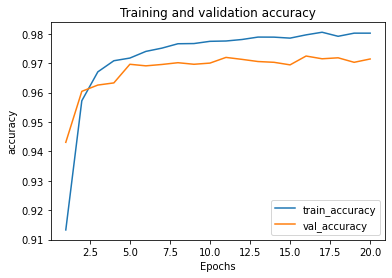

In [22]:
plot_metric(history, 'accuracy')

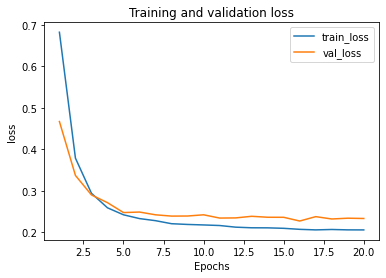

In [23]:
plot_metric(history, 'loss')

# Regularizers L1

In [24]:
from keras.regularizers import l1
# model is a 3-layer MLP with ReLU and dropout after each layer
mode1 = Sequential()
mode1.add(Dense(hidden_units,kernel_regularizer=l1(0.001), input_dim=input_size))
mode1.add(Activation('relu'))
mode1.add(Dense(hidden_units,kernel_regularizer=l1(0.001),))
mode1.add(Activation('relu'))
mode1.add(Dense(num_labels,kernel_regularizer=l1(0.001),))
mode1.add(Activation('softmax'))

In [25]:
mode1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-tr

In [26]:
mode1.compile(loss='categorical_crossentropy', 
 optimizer='adam',
 metrics=['accuracy'])

In [27]:
history2=mode1.fit(x_train, y_train, epochs=20,validation_split=0.25, batch_size=batch_size)

Epoch 1/20
352/352 [==============================] - 3s 6ms/step - loss: 2.8560 - accuracy: 0.8668 - val_loss: 1.1914 - val_accuracy: 0.8962
Epoch 2/20
352/352 [==============================] - 2s 6ms/step - loss: 1.0319 - accuracy: 0.9010 - val_loss: 0.9164 - val_accuracy: 0.9080
Epoch 3/20
352/352 [==============================] - 2s 7ms/step - loss: 0.8597 - accuracy: 0.9101 - val_loss: 0.8147 - val_accuracy: 0.9163
Epoch 4/20
352/352 [==============================] - 4s 11ms/step - loss: 0.7782 - accuracy: 0.9176 - val_loss: 0.7444 - val_accuracy: 0.9202
Epoch 5/20
352/352 [==============================] - 4s 11ms/step - loss: 0.7328 - accuracy: 0.9206 - val_loss: 0.7107 - val_accuracy: 0.9221
Epoch 6/20
352/352 [==============================] - 4s 11ms/step - loss: 0.7004 - accuracy: 0.9237 - val_loss: 0.6826 - val_accuracy: 0.9249
Epoch 7/20
352/352 [==============================] - 4s 11ms/step - loss: 0.6749 - accuracy: 0.9254 - val_loss: 0.6621 - val_accuracy: 0.9266
Ep

In [28]:
loss, acc = mode1.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 5ms/step - loss: 0.5305 - accuracy: 0.9405

Test accuracy: 94.1%


In [29]:
def plot_metric(history2, metric):
 train_metrics = history2.history[metric]
 val_metrics = history2.history['val_'+metric]
 epochs = range(1, len(train_metrics) + 1)
 plt.plot(epochs, train_metrics)
 plt.plot(epochs, val_metrics)
 plt.title('Training and validation '+ metric)
 plt.xlabel("Epochs")
 plt.ylabel(metric)
 plt.legend(["train_"+metric, 'val_'+metric])
 plt.show()

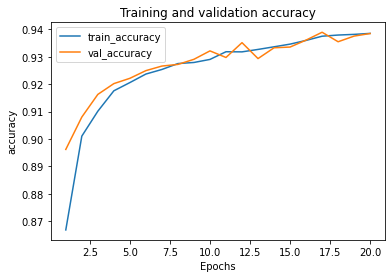

In [30]:
plot_metric(history2, 'accuracy')

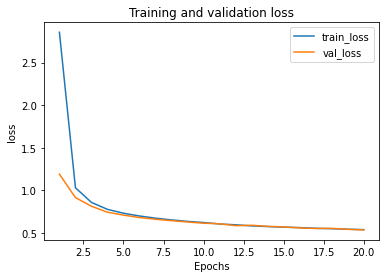

In [31]:
plot_metric(history2, 'loss')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

In [33]:
model.compile(loss='categorical_crossentropy', 
                optimizer='adam',
                 metrics=['accuracy'])

In [34]:
history2=mode1.fit(x_train, y_train, epochs=20,validation_split=0.25, batch_size=batch_size)

Epoch 1/20
352/352 [==============================] - 3s 9ms/step - loss: 0.5324 - accuracy: 0.9404 - val_loss: 0.5366 - val_accuracy: 0.9383
Epoch 2/20
352/352 [==============================] - 3s 8ms/step - loss: 0.5283 - accuracy: 0.9409 - val_loss: 0.5297 - val_accuracy: 0.9391
Epoch 3/20
352/352 [==============================] - 3s 9ms/step - loss: 0.5231 - accuracy: 0.9408 - val_loss: 0.5294 - val_accuracy: 0.9375
Epoch 4/20
352/352 [==============================] - 4s 12ms/step - loss: 0.5183 - accuracy: 0.9414 - val_loss: 0.5214 - val_accuracy: 0.9377
Epoch 5/20
352/352 [==============================] - 4s 12ms/step - loss: 0.5151 - accuracy: 0.9420 - val_loss: 0.5174 - val_accuracy: 0.9396
Epoch 6/20
352/352 [==============================] - 4s 12ms/step - loss: 0.5111 - accuracy: 0.9422 - val_loss: 0.5174 - val_accuracy: 0.9397
Epoch 7/20
352/352 [==============================] - 4s 12ms/step - loss: 0.5078 - accuracy: 0.9417 - val_loss: 0.5105 - val_accuracy: 0.9412
Ep

In [35]:
# model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

In [36]:
# loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
# print("\nTest accuracy: %.1f%%" % (100.0 * acc))

In [37]:
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))

In [38]:
from tensorflow.keras.datasets import mnist
# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

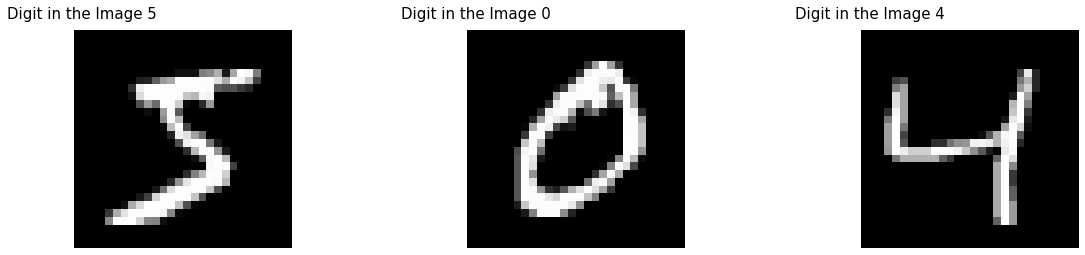

In [39]:
images = X_train[:3]
labels = y_train[:3]

f,ax = plt.subplots(nrows=1,ncols=3, figsize=(20,4))

for index,(img, ax) in enumerate(zip(images, ax)):
    
    ax.imshow(img,cmap='gray')
    ax.axis('off')
    ax.text(0.6,-2.0, f"Digit in the Image {labels[index]}", size=15, ha="center")
    
plt.show()

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

In [41]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [42]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [43]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape= (784,) ))
model.add(Dropout(0.2)) ###using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))###using regularizer
model.add(Dropout(0.2))###using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2')) ###using regularizer
model.add(Dropout(0.2))###using dropout
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

C:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [44]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [45]:
training_history = model.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback, es],
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8670 - accuracy: 0.1622 - val_loss: 4.4751 - val_accuracy: 0.2694
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 4.4137 - accuracy: 0.2686 - val_loss: 4.0775 - val_accuracy: 0.3672
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 4.1048 - accuracy: 0.3194 - val_loss: 3.7991 - val_accuracy: 0.4062
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 3.8608 - accuracy: 0.3440 - val_loss: 3.5574 - val_accuracy: 0.4240
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 3.6554 - accuracy: 0.3596 - val_loss: 3.3569 - val_accuracy: 0.4401
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 3.4738 - accuracy: 0.3685 - val_loss: 3.1758 - val_accuracy: 0.4479
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 3.2833 - accuracy: 0.3877 - val_loss: 2.8757 - val_acc